## Data-Simulated Model
* y = a + b * x
* x: 100 distributed values with normal N( 1.5 median , 2.5 std dev )

Setting Ye (Y estimated) to: 
* Ye = 5 + 1.9 * x + e(error)

* e distributed by normal N( 0 median, 0.8 std dev )

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn( 100 )

In [3]:
err = 0 + 0.8 * np.random.randn( 100 )

In [7]:
y_pred = 5 + 1.9 * x #Result linear regression model

In [9]:
y_current = 5 + 1.9 * x + err  # What we currently see

In [10]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_current_list = y_current.tolist()

In [14]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_current": y_current_list,
        "y_pred": y_pred_list
        
    }
)

In [15]:
data.head()

,x,y_current,y_pred
0,2.484284,10.544736,9.720139
1,0.988208,6.977663,6.877594
2,4.448049,13.392652,13.451293
3,0.578553,5.716498,6.099251
4,0.836374,7.009261,6.589111


In [16]:
import matplotlib.pyplot as plt

In [23]:
y_mean = [ np.mean(y_current) for i in range( 1, len(x_list)+1 ) ]

Text(0.5,1,'Current Value vs Predicted Value')

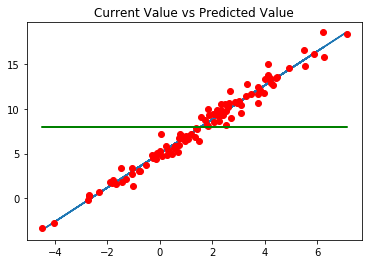

In [26]:
%matplotlib inline
plt.plot( data["x"], data["y_pred"] )
plt.plot( data["x"], data["y_current"], "ro" )
plt.plot( data["x"], y_mean, "g" )
plt.title( "Current Value vs Predicted Value" )

In [39]:
y_m = np.mean(y_current)
data["SSR"] = ( data["y_pred"] - y_m )**2
data["SSD"] = ( data["y_pred"] - data["y_current"] )**2
data["SST"] = ( data["y_current"] - y_m )**2

In [28]:
data.head()

,x,y_current,y_pred,SSR,SSD,SST
0,2.484284,10.544736,9.720139,3.023039,0.679960,6.570433
1,0.988208,6.977663,6.877594,1.218499,0.010014,1.007590
2,4.448049,13.392652,13.451293,29.919176,0.003439,29.281105
3,0.578553,5.716498,6.099251,3.542674,0.146500,5.130011
4,0.836374,7.009261,6.589111,1.938609,0.176526,0.945153


In [29]:
SSR = sum( data["SSR"] )
SSD = sum( data["SSD"] )
SST = sum( data["SST"] )

In [30]:
SSR

1951.9229685205255

In [31]:
SSD

54.81856703598532

In [41]:
SSR + SSD # It should return the same as SST

2006.7415355565108

In [32]:
SST

2035.6538781869533

In [53]:
R2 = SSR/SST # Regression 95.89% accurate
R2

0.9732095756297634

(array([ 3.,  3.,  4.,  8., 20., 26., 22.,  6.,  3.,  5.]),
 array([-2.10426645, -1.72216242, -1.3400584 , -0.95795437, -0.57585035,
        -0.19374633,  0.1883577 ,  0.57046172,  0.95256575,  1.33466977,
         1.71677379]),
 <a list of 10 Patch objects>)

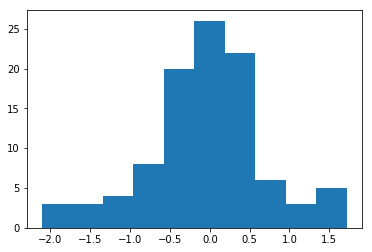

In [37]:
plt.hist( data["y_pred"] - data["y_current"] ) #It follows the expected normal distribution

## Obtaining Linear Regression Line Equation

* y = a + b * x
* b = sum((xi - x_m)*(y_i - y_m)) / sum((xi - x_m)**2)
* a = y_m - b * x_m

In [42]:
x_mean = np.mean( data["x"] )
y_mean = np.mean( data["y_current"] )

In [43]:
x_mean, y_mean

(1.5473005760742706, 7.981450634167726)

In [44]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_current"] - y_mean)
data["beta_d"] = (data["x"] - x_mean) ** 2

In [47]:
beta = sum( data["beta_n"] ) / sum( data["beta_d"] )
beta

1.9142411719549137

In [48]:
alpha = y_mean - beta * x_mean
alpha

5.019544166056801

### Lineal Model obtained by regression will be:
#### y = 5.019544166056801 + 1.9142411719549137 * x

In [49]:
data["y_model"] = alpha + beta * data["x"]

In [50]:
data.head()

,x,y_current,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.484284,10.544736,9.720139,3.023039,0.679960,6.570433,2.401756,0.877938,9.775063
1,0.988208,6.977663,6.877594,1.218499,0.010014,1.007590,0.561211,0.312585,6.911212
2,4.448049,13.392652,13.451293,29.919176,0.003439,29.281105,15.696535,8.414341,13.534183
3,0.578553,5.716498,6.099251,3.542674,0.146500,5.130011,2.194167,0.938471,6.127035
4,0.836374,7.009261,6.589111,1.938609,0.176526,0.945153,0.691155,0.505416,6.620566


In [51]:
SSR = sum(( data["y_model"] - y_mean )**2)
SSD = sum(( data["y_model"] - data["y_current"] )**2)
SST = sum(( data["y_current"] - y_mean )**2)

SSR, SSD, SST

(1981.1178469194067, 54.53603126754461, 2035.653878186953)

In [52]:
R2 = SSR / SST
R2 # Regression 97.32% accurate

0.9732095756297634

Text(0.5,1,'Current Value vs Predicted Value')

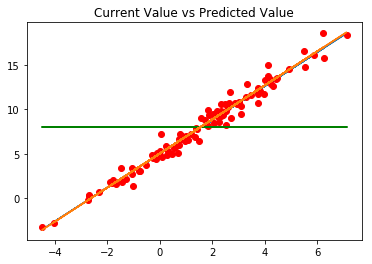

In [55]:
y_mean = [ np.mean(y_current) for i in range( 1, len(x_list)+1 ) ]

%matplotlib inline
plt.plot( data["x"], data["y_pred"] )
plt.plot( data["x"], data["y_current"], "ro" )
plt.plot( data["x"], y_mean, "g" )
plt.plot( data["x"], data["y_model"] )

plt.title( "Current Value vs Predicted Value" )

## Residual Standard Error

In [56]:
RSE = np.sqrt( SSD / (len(data)-2) )
RSE

0.7459826505857525

### Error asociated with the model used:

In [59]:
RSE / np.mean( data["y_current"] ) # 9.34%

0.09346454482751312